# Importacion de Datos y matrices
# Modelado
# visualizacion
# advertencias

In [1]:

import numpy as np
import pandas as pd


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Cargo datos subidos en Kaggle

In [2]:
train = pd.read_csv('../input/datos1/diamonds_train.csv')
test = pd.read_csv('../input/datos1/diamonds_test.csv')
sample_sub = pd.read_csv('../input/trainexample/sample_submission.csv')

**Visualización y manejo de datos**

# muestro cuerpo de los datos

In [4]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


# Exploro la info y tipo de objeto

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


# Veo outliers para ver incongruencias y sgtes pasos a seguir

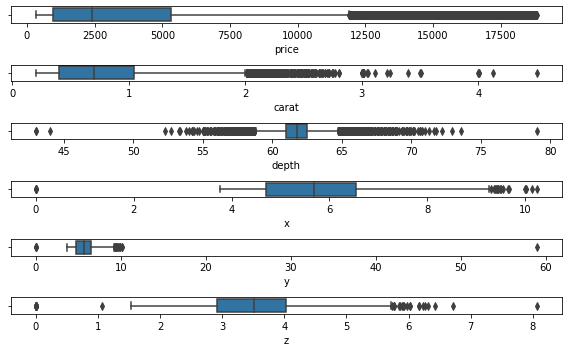

In [6]:
fig, axs = plt.subplots(6, figsize = (8,5))
plt1 = sns.boxplot(train['price'], ax = axs[0])
plt2 = sns.boxplot(train['carat'], ax = axs[1])
plt3 = sns.boxplot(train['depth'], ax = axs[2])
plt4 = sns.boxplot(train['x'], ax = axs[3])
plt5 = sns.boxplot(train['y'], ax = axs[4])
plt6 = sns.boxplot(train['z'], ax = axs[5])
plt.tight_layout()

# muestro forma actual de la matriz

In [7]:
train.shape

(40455, 10)

# muestro distribucion del precio

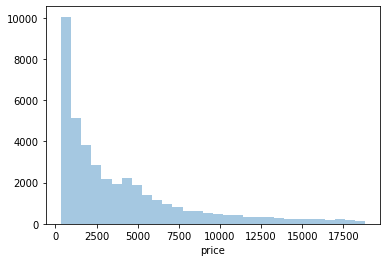

In [8]:
sns.distplot(train.price, kde = False , bins= 30);

# muestro dif. vistas de los diamantes segun rango del precio, agrego colores y muestro

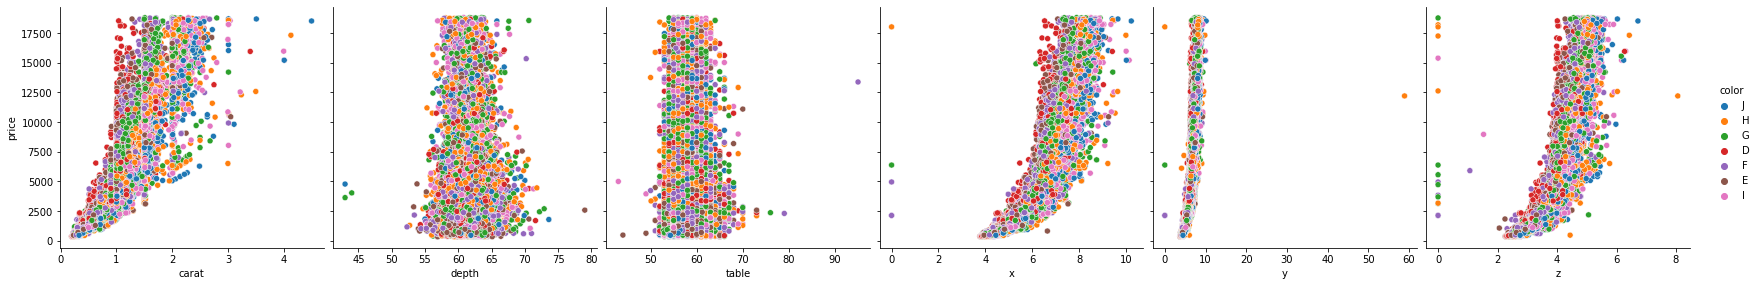

In [9]:
sns.pairplot(train, x_vars=['carat', 'depth','table', 'x', 'y','z'], y_vars='price',hue = 'color', height=4, aspect=1, kind='scatter')
plt.show()

**NO DESEO BORRAR OUTLIERS PARA NO ELIMINAR DATOS EN LOS PRECIOS FINALES DE LOS DIAMANTES**

# muestro los tipos de numeros y categorías para liego trabajarlas mas adelante

In [10]:
for col in ['cut','color','clarity']:
    print('{} : {}'.format(col,train[col].unique()))
train.nunique()  

cut : ['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
color : ['J' 'H' 'G' 'D' 'F' 'E' 'I']
clarity : ['VS2' 'VS1' 'SI1' 'SI2' 'IF' 'VVS1' 'VVS2' 'I1']


carat        270
cut            5
color          7
clarity        8
depth        175
table        121
price      10378
x            543
y            539
z            363
dtype: int64

# muestro correlacion entre pares

<AxesSubplot:>

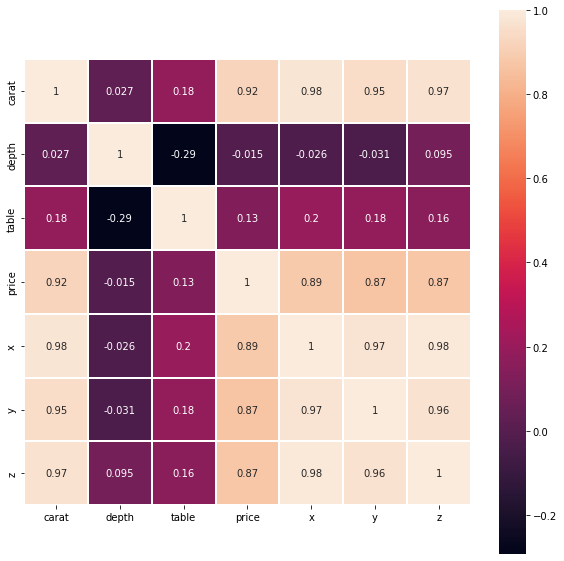

In [11]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

**#X Y Z Muestra alta correlacion, corte, color y claridad baja correlacion, los dejo asi.**

# convierto columnas categoricas en numericas del dataset de entrenamiento, usando label encoder y etiquetando.
# uso laber encoder en las categoricas

In [12]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

train['cut'] = label_cut.fit_transform(train['cut'])
train['color'] = label_color.fit_transform(train['color'])
train['clarity'] = label_clarity.fit_transform(train['clarity'])

# Exploro info, veo min, max %

In [13]:

train.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,2.552540,2.599234,3.840143,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.028828,1.701260,1.725009,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


# veo que hay valores nulos

In [14]:

train.loc[(train['x']==0) | (train['y']==0) | (train['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,3,2,3,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,3,4,5,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,1,2,3,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,1,3,3,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,2,2,3,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,3,4,3,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,3,4,2,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,3,3,3,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,2,3,5,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,3,3,3,63.0,59.0,3696,6.50,6.47,0.0


# sumo los nulos

In [15]:
len(train[(train['x']==0) | (train['y']==0) | (train['z']==0)])

16

# borro los nulos porque no tiene mucho sentido que x,y,z los tenga en mi matriz, no lo veo recomendable valores nulos en este caso

In [16]:
train = train[(train[['x','y','z']] != 0).all(axis=1)]

In [17]:
len(train[(train['x']==0) | (train['y']==0) | (train['z']==0)])

0

# muestro como queda

In [18]:

train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,3,6,5,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,4,4,5,63.0,57.0,505,4.35,4.38,2.75
2,0.71,0,3,4,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,1,0,2,63.8,56.0,738,4.68,4.72,3.00
4,1.02,2,3,2,60.5,59.0,4882,6.55,6.51,3.95


**ENTRENANDO y PROBANDO para modelar algoritmos y predecir**

# Entreno 

In [19]:

X = train.drop(['price'],axis=1)
y = train['price']

# Random_state number divide los conjuntos de datos de prueba y entrenamiento de forma aleatoria.
# Test_size determina si es flotante entre 0 y 1

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

# compruebo los resultados

In [21]:

print("X_train:" , X_train.shape)
print("X_test:" , X_test.shape)
print("y_train:" , y_train.shape)
print("y_test:" , y_test.shape)

X_train: (32351, 9)
X_test: (8088, 9)
y_train: (32351,)
y_test: (8088,)


# USO RANDOM FOREST REGRESSOR
### Entrenar el modelo con X_train, y_train

In [22]:

RFreg_model = RandomForestRegressor()

In [23]:
RFreg_model.fit(X_train, y_train)

RandomForestRegressor()

# Se busca que r2(coeficiente de determinacion) sea lo mas cercano a 1 
# Mean Squared = Pérdida de regresión del error cuadrático medio.

In [24]:

RFreg_model = RandomForestRegressor()
RFreg_model.fit(X_train,y_train)
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))

# imprimo para ver los valores

In [25]:

print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

RMSE value is = 549.3102935474509
R-squared value is 0.9813365453354621


# entreno predicciones

In [26]:

predictions = RFreg_model.predict(X_test)
print(predictions)

[ 9938.48 16089.74   830.02 ...  1287.9  11897.11   969.28]


# Cargo el test que tenemos subido en Kaggle

In [27]:

X_pred = pd.read_csv('../input/datos1/diamonds_test.csv', index_col = 0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


# veo tuplas

In [28]:

X_pred.shape

(13485, 9)

In [29]:
X_pred

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19
...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53


# convierto columnas categoricas en numericas nuevmente pero del test usando label encoder

In [30]:

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

X_pred['cut'] = label_cut.fit_transform(X_pred['cut'])
X_pred['color'] = label_color.fit_transform(X_pred['color'])
X_pred['clarity'] = label_clarity.fit_transform(X_pred['clarity'])

# muestro

In [31]:

X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.79,4,2,2,62.7,60.0,5.82,5.89,3.67
1,1.20,2,6,4,61.0,57.0,6.81,6.89,4.18
2,1.57,3,4,2,62.2,61.0,7.38,7.32,4.57
3,0.90,4,2,2,63.8,54.0,6.09,6.13,3.90
4,0.50,4,2,4,62.9,58.0,5.05,5.09,3.19


# muestro como queda x

In [32]:

print(X)

       carat  cut  color  clarity  depth  table     x     y     z
0       1.21    3      6        5   62.4   58.0  6.83  6.79  4.25
1       0.32    4      4        5   63.0   57.0  4.35  4.38  2.75
2       0.71    0      3        4   65.5   55.0  5.62  5.53  3.65
3       0.41    1      0        2   63.8   56.0  4.68  4.72  3.00
4       1.02    2      3        2   60.5   59.0  6.55  6.51  3.95
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
40450   1.34    2      3        4   62.7   57.0  7.10  7.04  4.43
40451   2.02    1      2        3   57.1   60.0  8.31  8.25  4.73
40452   1.01    2      4        2   62.7   56.0  6.37  6.42  4.01
40453   0.33    2      6        4   61.9   54.3  4.45  4.47  2.76
40454   1.24    2      5        2   62.0   58.0  6.83  6.88  4.25

[40439 rows x 9 columns]


In [33]:
print(X_pred)

       carat  cut  color  clarity  depth  table     x     y     z
id                                                               
0       0.79    4      2        2   62.7   60.0  5.82  5.89  3.67
1       1.20    2      6        4   61.0   57.0  6.81  6.89  4.18
2       1.57    3      4        2   62.2   61.0  7.38  7.32  4.57
3       0.90    4      2        2   63.8   54.0  6.09  6.13  3.90
4       0.50    4      2        4   62.9   58.0  5.05  5.09  3.19
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
13480   0.57    2      1        2   61.9   56.0  5.35  5.32  3.30
13481   0.71    2      5        5   62.2   55.0  5.71  5.73  3.56
13482   0.70    2      2        4   61.6   55.0  5.75  5.71  3.53
13483   0.70    4      2        3   58.8   57.0  5.85  5.89  3.45
13484   0.40    2      5        7   62.4   55.0  4.70  4.73  2.94

[13485 rows x 9 columns]


In [34]:
predictions_submit = RFreg_model.predict(X_pred)
predictions_submit

array([2911.39, 5333.71, 8828.86, ..., 3006.7 , 2206.62,  822.11])

# leo el submission cargado

In [35]:

sample = pd.read_csv('../input/trainexample/sample_submission.csv')

# preparo submision

In [36]:

submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [37]:
submission.head()

,id,price
0,0,2911.39
1,1,5333.71
2,2,8828.86
3,3,4120.04
4,4,1688.42


In [38]:
# Finalizado y listo para subir a Kaggle